![](https://torpedogroup.com/app/uploads/2019/11/BERT-Logo-300x340-2.jpg)<a id="TOC1"></a> <br>

# BERT: Bidirectional Encoder Representations from Transformers

## Table of Contents
1. [**Introduction**](#A1)

    1.1 [**What is BERT?**](#A11)
    
    1.2 [**Architecture**](#A12)
    
    1.3 [**Why we needed BERT?**](#A13)
    
    1.4 [**Core Idea of BERT**](#A14)
    
    1.5 [**How does it work**](#A15)
    
    1.6 [**When can we use it?**](#A16)
    
    1.7 [**How to fine-tune it?**](#A17)
     
1. [**Use Case - Text Classification using BERT**](#A2)
    
1. [References](#A3)  

1. [Conclusion](#A4) 

## 1. Introduction <a id="A1"></a> <br>
At the end of 2018 researchers at Google AI Language open-sourced a new technique for Natural Language Processing (NLP) called BERT (Bidirectional Encoder Representations from Transformers) —  a major breakthrough which took the Deep Learning community by storm because of its incredible performance.

### 1.1 What is BERT? <a id="A11"></a> <br>

**BERT** stands for **B**idirectional **E**ncoder **R**epresentations from **T**ransformers. Let us understand this in detail each word .

* **Bidirectional** - to understand the text you’re looking you’ll have to look back (at the previous words) and forward (at the next words)
* **Transformers** - [The Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf) paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. his in a sentence refers to Jim).
* **(Pre-trained) contextualized word embeddings** - [The ELMO paper](https://arxiv.org/pdf/1802.05365v2.pdf) introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.

BERT was trained by masking 15% of the tokens with the goal to guess them. An additional objective was to predict the next sentence.

### 1.2 Architecture <a id="A12"></a> <br>
The original BERT model was developed and trained by Google using TensorFlow. BERT is released in two sizes **BERTBASE** and **BERTLARGE**. 

The BASE model is used to measure the performance of the architecture comparable to another architecture and the LARGE model produces state-of-the-art results that were reported in the research paper.

One of the main reasons for the good performance of BERT on different NLP tasks was the use of **Semi-Supervised Learning**. This means the model is trained for a specific task that enables it to understand the patterns of the language. After training the model (BERT) has language processing capabilities that can be used to empower other models that we build and train using supervised learning.

**BERT** is basically an Encoder stack of transformer architecture. A transformer architecture is an encoder-decoder network that uses self-attention on the encoder side and attention on the decoder side. 

**BERTBASE** has 12 layers in the Encoder stack while **BERTLARGE** has 24 layers in the Encoder stack. These are more than the Transformer architecture described in the original paper (6 encoder layers). 

**BERT** architectures (BASE and LARGE) also have larger feedforward-networks (768 and 1024 hidden units respectively), and more attention heads (12 and 16 respectively) than the Transformer architecture suggested in the original paper. It contains 512 hidden units and 8 attention heads. 

**BERTBASE** contains 110M parameters while BERTLARGE has 340M parameters.

So in summary
* **BERT-Base**: 12 layer Encoder / Decoder, d = 768, 110M parameters
* **BERT-Large**: 24 layer Encoder / Decoder, d = 1024, 340M parameters

where d is the dimensionality of the final hidden vector output by BERT. Both of these have a Cased and an Uncased version (the Uncased version converts all words to lowercase).

![](https://media.geeksforgeeks.org/wp-content/uploads/20200407004114/bert-base-and-large.jpg)

This model takes CLS token as input first, then it is followed by a sequence of words as input. Here CLS is a classification token. It then passes the input to the above layers. Each layer applies self-attention, passes the result through a feedforward network after then it hands off to the next encoder.

The model outputs a vector of hidden size (768 for BERT BASE). If we want to output a classifier from this model we can take the output corresponding to CLS token.
![](https://media.geeksforgeeks.org/wp-content/uploads/20200407005130/BERT-embedding-output.jpg)

### 1.3 Why we needed BERT? <a id="A13"></a> <br>

One of the biggest challenges in NLP is the **lack of enough training data**. Overall there is enormous amount of text data available, but if we want to create task-specific datasets, we need to split that pile into the very many diverse fields. And when we do this, we end up with only a few thousand or a few hundred thousand human-labeled training examples. Unfortunately, in order to perform well, deep learning based NLP models require much larger amounts of data —  they see major improvements when trained on millions, or billions, of annotated training examples. 

To help bridge this gap in data, researchers have developed various techniques for training general purpose language representation models using the enormous piles of unannotated text on the web (this is known as pre-training). These general purpose pre-trained models can then be fine-tuned on smaller task-specific datasets, e.g., when working with problems like question answering and sentiment analysis. This approach results in great accuracy improvements compared to training on the smaller task-specific datasets from scratch. BERT is a recent addition to these techniques for NLP pre-training; it caused a stir in the deep learning community because it presented state-of-the-art results in a wide variety of NLP tasks, like question answering.

The best part about BERT is that it can be download and used for free —  we can either use the  BERT models to extract high quality language features from our text data, or we can fine-tune these models on a specific task, like sentiment analysis and question answering, with our own data to produce state-of-the-art predictions.

In **summary** the following are the main benefits of using BERT:

**Easy Training**

First, the pre-trained BERT model weights already encode a lot of information about our language. As a result, it takes much less time to train our fine-tuned model - it is as if we have already trained the bottom layers of our network extensively and only need to gently tune them while using their output as features for our classification task. In fact, the authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours needed to train the original BERT model or a LSTM from scratch!).

**Less Data**

In addition and perhaps just as important, because of the pre-trained weights this method allows us to fine-tune our task on a much smaller dataset than would be required in a model that is built from scratch. A major drawback of NLP models built from scratch is that we often need a prohibitively large dataset in order to train our network to reasonable accuracy, meaning a lot of time and energy had to be put into dataset creation. By fine-tuning BERT, we are now able to get away with training a model to good performance on a much smaller amount of training data.

**Good Results**

Second, this simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) was shown to achieve state of the art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question answering, etc. Rather than implementing custom and sometimes-obscure architetures shown to work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.

**A Shift in NLP**

This shift to transfer learning parallels the same shift that took place in computer vision a few years ago. Creating a good deep learning network for computer vision tasks can take millions of parameters and be very expensive to train. Researchers discovered that deep networks learn hierarchical feature representations (simple features like edges at the lowest layers with gradually more complex features at higher layers). Rather than training a new network from scratch each time, the lower layers of a trained network with generalized image features could be copied and transfered for use in another network with a different task. It soon became common practice to download a pre-trained deep network and quickly retrain it for the new task or add additional layers on top - vastly preferable to the expensive process of training a network from scratch. For many, the introduction of deep pre-trained language models in 2018 (ELMO, BERT, ULMFIT, Open-GPT, etc.) signals the same shift to transfer learning in NLP that computer vision saw.


### 1.4 Core Idea of BERT <a id="A14"></a> <br>

What is language modeling really about? Which problem are language models trying to solve? Basically, their task is to “fill in the blank” based on context. For example, given

“The woman went to the store and bought a _____ of shoes.”

a language model might complete this sentence by saying that the word “cart” would fill the blank 20% of the time and the word “pair” 80% of the time.

In the pre-BERT world, a language model would have looked at this text sequence during training from either left-to-right or combined left-to-right and right-to-left. This one-directional approach works well for generating sentences — we can predict the next word, append that to the sequence, then predict the next to next word until we have a complete sentence.

Now enters BERT, a language model which is bidirectionally trained (this is also its key technical innovation). This means we can now have a deeper sense of language context and flow compared to the single-direction language models.

Instead of predicting the next word in a sequence, BERT makes use of a novel technique called **Masked LM** (MLM): it randomly masks words in the sentence and then it tries to predict them. Masking means that the model looks in both directions and it uses the full context of the sentence, both left and right surroundings, in order to predict the masked word. Unlike the previous language models, it takes both the previous and next tokens into account at the same time. The existing combined left-to-right and right-to-left LSTM based models were missing this “same-time part”. (It might be more accurate to say that BERT is non-directional though.)

But why is this non-directional approach so powerful? 

Pre-trained language representations can either be context-free or context-based. Context-based representations can then be unidirectional or bidirectional. Context-free models like word2vec generate a single word embedding representation (a vector of numbers) for each word in the vocabulary.

For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.” On the other hand, context-based models generate a representation of each word that is based on the other words in the sentence. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” However, BERT represents “bank” using both its previous and next context — “I accessed the … account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.
![](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/01/Screen-Shot-2019-01-03-at-11.22.11-AM.png?fit=750%2C192)

It’s evident from the above image: BERT is bi-directional, GPT is unidirectional (information flows only from left-to-right), and ELMO is shallowly bidirectional.

BERT is based on the Transformer model architecture, instead of LSTMs. We will very soon see the model details of BERT, but in general:

A Transformer works by performing a small, constant number of steps. In each step, it applies an attention mechanism to understand relationships between all words in a sentence, regardless of their respective position. For example, given the sentence,  “I arrived at the bank after crossing the river”, to determine that the word “bank” refers to the shore of a river and not a financial institution, the Transformer can learn to immediately pay attention to the word “river” and make this decision in just one step.

### 1.5 How does it work? <a id="A15"></a> <br>
BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

* **Token embeddings**: A  token is added to the input word tokens at the beginning of the first sentence and a  token is inserted at the end of each sentence.
* **Segment embeddings**: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
* **Positional embeddings**: A positional embedding is added to each token to indicate its position in the sentence.
![](https://towardsml.files.wordpress.com/2019/09/input.png?w=810)
The input representation for BERT: The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.
 

Essentially, the Transformer stacks a layer that maps sequences to sequences, so the output is also a sequence of vectors with a 1:1 correspondence between input and output tokens at the same index. And as we learnt earlier, BERT does not try to predict the next word in the sentence. 

BERT is pre-trained on two NLP tasks:

**1. Masked Language Modeling (MLM)**

BERT is designed as a deeply bidirectional model. The network effectively captures information from both the right and left context of a token from the first layer itself and all the way through to the last layer.

Traditionally, we had language models either trained to predict the next word in a sentence (right-to-left context used in GPT) or language models that were trained on a left-to-right context. This made our models susceptible to errors due to loss in information.

Let us take an example to understand it better

Let’s say we have a sentence – “I love to read data science blogs on Kaggle”. We want to train a bi-directional language model. Instead of trying to predict the next word in the sequence, we can build a model to predict a missing word from within the sequence itself.

Let’s replace “Kaggle” with “[MASK]”. This is a token to denote that the token is missing. We’ll then train the model in such a way that it should be able to predict “Kaggle” as the missing token: “I love to read data science blogs on [MASK].”

This is the crux of a Masked Language Model. The authors of BERT also include some caveats to further improve this technique:

To prevent the model from focusing too much on a particular position or tokens that are masked, the researchers randomly masked 15% of the words.

The masked words were not always replaced by the masked tokens [MASK] because the [MASK] token would never appear during fine-tuning.

So, the researchers used the below technique:

* 80% of the time the words were replaced with the masked token [MASK]
* 10% of the time the words were replaced with random words
* 10% of the time the words were left unchanged


**2. Next Sentence Prediction (NSP)**

**Masked Language Models (MLMs)** learn to understand the relationship between words. Additionally, BERT is also trained on the task of Next Sentence Prediction for tasks that require an understanding of the relationship between sentences.

In order to understand relationship between two sentences, BERT training process also uses next sentence prediction. A pre-trained model with this kind of understanding is relevant for tasks like question answering. During training the model gets as input pairs of sentences and it learns to predict if the second sentence is the next sentence in the original text as well.

As we have seen earlier, BERT separates sentences with a special [SEP] token. During training the model is fed with two input sentences at a time such that:

* 50% of the time the second sentence comes after the first one.
* 50% of the time it is a a random sentence from the full corpus.

BERT is then required to predict whether the second sentence is random or not, with the assumption that the random sentence will be disconnected from the first sentence:
![](https://towardsml.files.wordpress.com/2019/09/nsp-1.png)

To predict if the second sentence is connected to the first one or not, basically the complete input sequence goes through the Transformer based model, the output of the [CLS] token is transformed into a 2×1 shaped vector using a simple classification layer, and the IsNext-Label is assigned using softmax.

The model is trained with both Masked LM and Next Sentence Prediction together. This is to minimize the combined loss function of the two strategies — “together is better”.

### 1.6 When can we use it? <a id="A16"></a> <br>

BERT outperformed the state-of-the-art across a wide variety of tasks under general language understanding like

* **Natural Language Inference**
* **Sentiment Analysis**
* **Question Answering** 
* **Paraphrase detection**
* **Linguistic Acceptability**

### 1.7 How to fine-tune BERT? <a id="A17"></a> <br>
![](https://www.researchgate.net/publication/340295341/figure/fig1/AS:874992090771456@1585625779336/BERT-architecture-1.jpg)
Using BERT for a specific task is relatively straightforward:

BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model:
1. Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.
1. In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.
![](https://blog.scaleway.com/content/images/2019/08/squadbert.jpeg)
1. In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.
1. In the fine-tuning training, most hyper-parameters stay the same as in BERT training, and the paper gives specific guidance on the hyper-parameters that require tuning. The BERT team has used this technique to achieve state-of-the-art results on a wide variety of challenging natural language tasks.

## 2. Use Case - Text Classification using BERT <a id="A2"></a> <br>


Let us install the pytorch interface for BERT by Hugging Face. (This library contains interfaces for other pretrained language models like OpenAI's GPT and GPT-2.) I have selected the pytorch interface because it strikes a nice balance between the high-level APIs and tensorflow code .

In [70]:
!pip install pytorch-pretrained-bert pytorch-nlp

    100% |████████████████████████████████| 133kB 868kB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 2.5MB/s ta 0:00:01
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.2 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.5.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.2 which is incompatible.
fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1 which is incompatible.
anaconda-client 1.7.2 has requirement python-dateutil>=2.6.1, but you'll have python-dateutil 2.6.0 which is incompatible.
imbalanced-learn 0.5.0.dev0 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
# Import Libraries

import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load Dataset:

I will be using **The Corpus of Linguistic Acceptability (CoLA) dataset** for single sentence classification. 

It's a set of sentences labeled as grammatically correct or incorrect. The data is as follows:

Column 1: the code representing the source of the sentence.

Column 2: the acceptability judgment label (0=unacceptable, 1=acceptable).

Column 3: the acceptability judgment as originally notated by the author.

Column 4: the sentence.

In [72]:
df = pd.read_csv("../input/cola-the-corpus-of-linguistic-acceptability/cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

In [73]:
df.shape

(8551, 4)

In [74]:
df.sample(10)

,sentence_source,label,label_notes,sentence
4403,ks08,1,NaN,John will leave the party earlier.
1364,r-67,1,NaN,The boy's guardians' employer we elected president.
4630,ks08,1,NaN,No one believes that he is a fool.
2691,l-93,1,NaN,Amanda carried the package to New York.
8531,ad03,0,*,Anson believed to be happy.
887,bc01,0,*,Lucy Barnes recounted a story to remember because remember Holly had recounted a story to.
6865,m_02,1,NaN,Norman Lemming jumped off the cliff and so did William Lemming.
329,bc01,1,NaN,"He hasn't often paid taxes, has he?"
3826,ks08,1,NaN,The government kept all the money.
3139,l-93,1,NaN,Linda winked.


In [75]:
# Create sentence and label lists
sentences = df.sentence.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df.label.values

Next, import the BERT tokenizer, used to convert our text into tokens that correspond to BERT's vocabulary.

In [76]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 231508/231508 [00:00<00:00, 895136.86B/s]


Tokenize the first sentence:
['[CLS]', 'our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.', '[SEP]']


BERT requires specifically formatted inputs. For each tokenized input sentence, we need to create:

* **input ids**: a sequence of integers identifying each input token to its index number in the BERT tokenizer vocabulary
* **segment mask**: (optional) a sequence of 1s and 0s used to identify whether the input is one sentence or two sentences long. For one sentence inputs, this is simply a sequence of 0s. For two sentence inputs, there is a 0 for each token of the first sentence, followed by a 1 for each token of the second sentence
* **attention mask**: (optional) a sequence of 1s and 0s, with 1s for all input tokens and 0s for all padding tokens (we'll detail this in the next paragraph)
* **labels**: a single value of 1 or 0. In our task 1 means "grammatical" and 0 means "ungrammatical"

Although we can have variable length input sentences, BERT does requires our input arrays to be the same size. I addressed this by first choosing a maximum sentence length, and then padding and truncating our inputs until every input sequence is of the same length.

* To "pad" our inputs in this context means that if a sentence is shorter than the maximum sentence length, we simply add 0s to the end of the sequence until it is the maximum sentence length.

* If a sentence is longer than the maximum sentence length, then we simply truncate the end of the sequence, discarding anything that does not fit into our maximum sentence length.

I padded and truncated the sequences so that they all become of length MAX_LEN ("post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning) .

pad_sequences is a utility function that we're borrowing from Keras. It simply handles the truncating and padding of Python lists.

In [77]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 128

In [78]:
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [79]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [80]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [81]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [82]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [83]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

### Train Model
Now that our input data is properly formatted, it's time to fine tune the BERT model.

For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task. Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built on top of a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.

We'll load **BertForSequenceClassification**. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

**Structure of Fine-Tuning Model**

As we've showed beforehand, the first token of every sequence is the special classification token ([CLS]). Unlike the hidden state vector corresponding to a normal word token, the hidden state corresponding to this special token is designated by the authors of BERT as an aggregate representation of the whole sentence used for classification tasks. As such, when we feed in an input sentence to our model during training, the output is the length 768 hidden state vector corresponding to this token. The additional layer that we've added on top consists of untrained linear neurons of size [hidden_state, number_of_labels], so [768,2], meaning that the output of BERT plus our classification layer is a vector of two numbers representing the "score" for "grammatical/non-grammatical" that are then fed into cross-entropy loss.

**The Fine-Tuning Process**

Because the pre-trained BERT layers already encode a lot of information about the language, training the classifier is relatively inexpensive. Rather than training every layer in a large model from scratch, it's as if we have already trained the bottom layers 95% of where they need to be, and only really need to train the top layer, with a bit of tweaking going on in the lower levels to accomodate our task.

Sometimes practicioners will opt to "freeze" certain layers when fine-tuning, or to apply different learning rates, apply diminishing learning rates, etc. all in an effort to preserve the good quality weights in the network and speed up training (often considerably). In fact, recent research on BERT specifically has demonstrated that freezing the majority of the weights results in only minimal accuracy declines, but there are exceptions and broader rules of transfer learning that should also be considered. For example, if your task and fine-tuning dataset is very different from the dataset used to train the transfer learning model, freezing the weights may not be a good idea. We'll cover the broader scope of transfer learning in NLP in a future post.

OK, let's load BERT! There are a few different pre-trained BERT models available. "bert-base-uncased" means the version that has only lowercase letters ("uncased") and is the smaller version of the two ("base" vs "large").

In [84]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

100%|██████████| 407873900/407873900 [00:11<00:00, 34272338.49B/s]


Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend the following hyperparameter ranges:

Batch size: 16, 32
Learning rate (Adam): 5e-5, 3e-5, 2e-5
Number of epochs: 2, 3, 4

In [85]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]

In [86]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = BertAdam(optimizer_grouped_parameters,lr=2e-5,warmup=.1)

t_total value of -1 results in schedule not being applied


For each pass in the training loop we have a training phase and a validation phase. 

At each pass we need to:

**Training loop:**

* Tell the model to compute gradients by setting the model in train mode
* Unpack our data inputs and labels
* Load data onto the GPU for acceleration
* Clear out the gradients calculated in the previous pass. In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out
* Forward pass (feed input data through the network)
* Backward pass (backpropagation)
* Tell the network to update parameters with optimizer.step()
* Track variables for monitoring progress

**Evalution loop:**

* Tell the model not to compute gradients by setting th emodel in evaluation mode
* Unpack our data inputs and labels
* Load data onto the GPU for acceleration
* Forward pass (feed input data through the network)
* Compute loss on our validation data and track variables for monitoring progress

In [87]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [88]:
t = [] 

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs 
epochs = 2

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Train loss: 0.5001029639323222


Epoch:  50%|█████     | 1/2 [1:47:49<1:47:49, 6469.59s/it]

Validation Accuracy: 0.8217592592592593
Train loss: 0.24790412583291777


Epoch: 100%|██████████| 2/2 [3:35:19<00:00, 6459.98s/it]  

Validation Accuracy: 0.8263888888888888


## Training Evaluation

Let's take a look at our training loss over all batches:

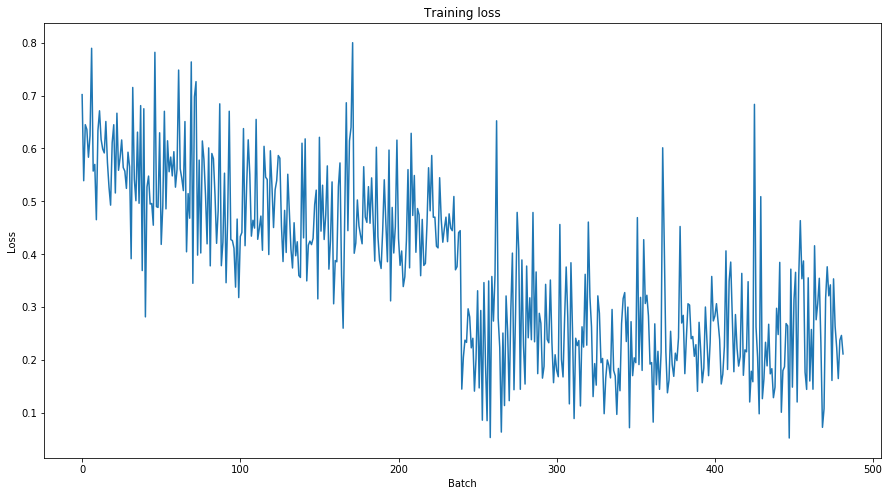

In [89]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

## Predict and Evaluate on Holdout Set
Now we'll load the holdout dataset and prepare inputs just as we did with the training set. Then we'll evaluate predictions using [Matthew's correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) because this is the metric used by the wider NLP community to evaluate performance on CoLA. With this metric, +1 is the best score, and -1 is the worst score. This way, we can see how well we perform against the state of the art models for this specific task.

In [90]:
df = pd.read_csv("../input/cola-the-corpus-of-linguistic-acceptability/cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

In [91]:
# Create sentence and label lists
sentences = df.sentence.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df.label.values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]


MAX_LEN = 128

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
  
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [92]:
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
 # batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [93]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []

for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## 3. References <a id="A3"></a> <br>

* https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/
* https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/
* https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
* https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/